## 1. PDB Format and Parsing
While some other bioinformatics file formats online include mainly sequence data, the PDB file format provides an assortmet of information including:

Amino acid sequence

Non-amino acid species

xyz coordinates of atoms indentified in structure (does not typically include hydrogens)

Metadata about the protein (e.g., host specie and enzyme class)

Information about helix and sheet secondary structures

PDB files are text files with the data arranged with specific labels and seperated by strictly-delineated position in a line in the file. For more information on PDB file formats, see https://www.cgl.ucsf.edu/chimera/docs/UsersGuide/tutorials/pdbintro.html.

Be sure to run the following code cell.



In [ ]:
!pip -q install Biopython
!pip -q install matplotlib
!pip -q install py3Dmol

import warnings
from Bio import BiopythonWarning
warnings.simplefilter('ignore', BiopythonWarning)

import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

import Bio.PDB
!wget -nc -O bicourse.zip https://mcm.h-its.org/wiki/lib/exe/fetch.php?media=googlecolab:bicourse.zip
!wget -nc -O peptide3.txt https://mcm.h-its.org/wiki/lib/exe/fetch.php?media=googlecolab:peptide3.txt
!unzip -oq bicourse.zip

--2023-12-21 14:25:40--  https://mcm.h-its.org/wiki/lib/exe/fetch.php?media=googlecolab:bicourse.zip
Resolving mcm.h-its.org (mcm.h-its.org)... 193.197.73.80
Connecting to mcm.h-its.org (mcm.h-its.org)|193.197.73.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7435049 (7.1M) [application/zip]
Saving to: ‘bicourse.zip’

bicourse.zip        100%[===================>]   7.09M  7.05MB/s    in 1.0s    

2023-12-21 14:25:41 (7.05 MB/s) - ‘bicourse.zip’ saved [7435049/7435049]

--2023-12-21 14:25:41--  https://mcm.h-its.org/wiki/lib/exe/fetch.php?media=googlecolab:peptide3.txt
Resolving mcm.h-its.org (mcm.h-its.org)... 193.197.73.80
Connecting to mcm.h-its.org (mcm.h-its.org)|193.197.73.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1458 (1.4K) [text/plain]
Saving to: ‘peptide3.txt’

peptide3.txt        100%[===================>]   1.42K  --.-KB/s    in 0s      

2023-12-21 14:25:42 (157 MB/s) - ‘peptide3.txt’ saved [1458/1458]



## 2. Parsing PDB Files
There are multiple ways of parsing data (i.e., seperating data into pieces) from the PDB files. In this activity, we will use the biopython library’s PDB reading capabilities. First, we need to import the PDB module of the biopython library with the import Bio.PDB import command.


```
ATOM    220  N   GLY    31       3.984  11.764  10.241  1.00  4.99      1CRN 289
ATOM    221  CA  GLY    31       4.769  12.336  11.360  1.00  5.50      1CRN 290
ATOM    222  C   GLY    31       6.255  12.243  11.106  1.00  4.19      1CRN 291
ATOM    223  O   GLY    31       7.037  12.750  11.954  1.00  6.12      1CRN 292
ATOM    224  N   CYS    32       6.710  11.631   9.992  1.00  4.30      1CRN 293
ATOM    225  CA  CYS    32       8.140  11.694   9.635  1.00  4.89      1CRN 294
ATOM    226  C   CYS    32       8.500  13.141   9.206  1.00  5.50      1CRN 295

```
Parsing allows the computer program to access the columns and rows with individual variables.



In [ ]:
parser = Bio.PDB.PDBParser()
parser = Bio.PDB.PDBParser()
structure = parser.get_structure('6x8j', '6x8j.pdb')

##3. Structure of the Data
The structural data extracted from the PDB by biopython is organized in a hierarchy starting with the

**structure** -> **model** -> **chain** -> **residue** -> **atom**

 The structure is the protein, the model is a particular 3D model of the protein, the chain is a single peptide chain in the protein, the residue is an amino acid residue in the chain, and the atom is each atom within a given chain.



In [ ]:
protein_model = structure[0]

for chain in protein_model:
    print(chain)

<Chain id=A>
<Chain id=C>
<Chain id=B>
<Chain id=D>
<Chain id=E>
<Chain id=F>


In [ ]:
chain_A = protein_model['A']
res = chain_A[58]
res

<Residue TYR het=  resseq=58 icode= >

In [ ]:
res.get_unpacked_list()

[<Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom CD1>,
 <Atom CD2>,
 <Atom CE1>,
 <Atom CE2>,
 <Atom CZ>,
 <Atom OH>]

##4. Examining Amino Acid Frequency
a. All Amino Acids in Protein
Next, we will look at and visualize the amino acid residue distribution in our protein. Below is code that you can run that iterates through the peptides and adds each amino acid residue identity to a list called amino_acids.

In [ ]:
def get_aa(file):
    '''Accepts a PDB files name (string) and returns a list of residues
    that occur in a peptide.

     >>> ('1abc.pdb') -> ['GLY', 'ALA', 'LYS']
    '''

    amino_acids = []  # empty list to add the amino acids to

    parser = Bio.PDB.PDBParser()
    structure = parser.get_structure('6x8j', '6x8j.pdb')
    pp = Bio.PDB.PPBuilder().build_peptides(structure[0])

    # go through each chain and residue and append the amino acid identity to the list
    for chain in pp:
        for res in chain:
            res_name = res.get_resname()
            amino_acids.append(res_name)

    return amino_acids

amino_acids = get_aa('6x8j.pdb')

###Visualization Using a countplot()
Next, we will visualize the above data using the seaborn plotting library’s sns.coutplot() function. This plotting function takes in the data and tallies the number of occurances of each value in the data. In this case, the data are stored in the variable sense.

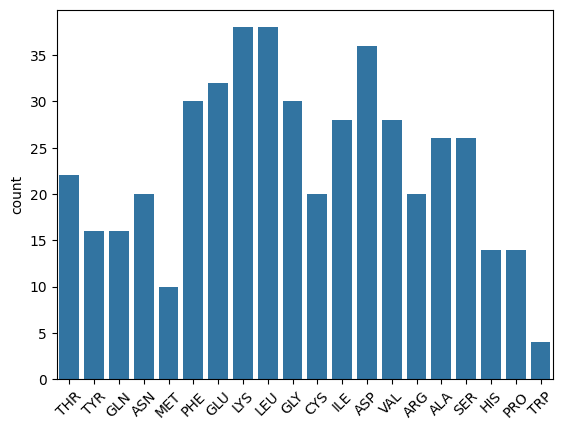

In [ ]:
sns.countplot(x=amino_acids, color='C00')
plt.xticks(rotation=45)
plt.show()


## 5. Amino Acids in Helicies and Sheets
Next, we will harvest lists of amino acids residues that occur at the start of a helix or sheet. Note: not all helicies are
alpha-helicies as there are a fare number of
3/10-helices in this dataset as well.

In [ ]:
def get_helix_start(file):
    '''Accepts a PDB files name (string) and returns a list of residues
    that occur at the start of a helix.

     >>> ('1abc.pdb') -> ['GLY', 'ALA', 'LYS']
    '''

    AA_list = []

    with open(file, 'r') as f:
        for line in f:
            if line.startswith('HELIX'):
                AA_list.append(line[15:18])

    return AA_list

def get_sheet_start(file):
    '''Accepts a PDB files name (string) and returns a list of residues
    that occur at the start of a sheet.

     >>> ('1abc.pdb') -> ['GLY', 'ALA', 'LYS']
    '''

    AA_list = []

    with open(file, 'r') as f:
        for line in f:
            if line.startswith('SHEET'):
                AA_list.append(line[17:20])


    return AA_list
top80='top80'
helix_start = []
sheet_start = []
general = []

for file in os.listdir(top80):
    if file.endswith('pdb'):
        helix_start.extend(get_helix_start(os.path.join(top80,file)))
        sheet_start.extend(get_sheet_start(os.path.join(top80,file)))
        general.extend(get_aa(os.path.join(top80,file)))


## Let’s now plot the result.

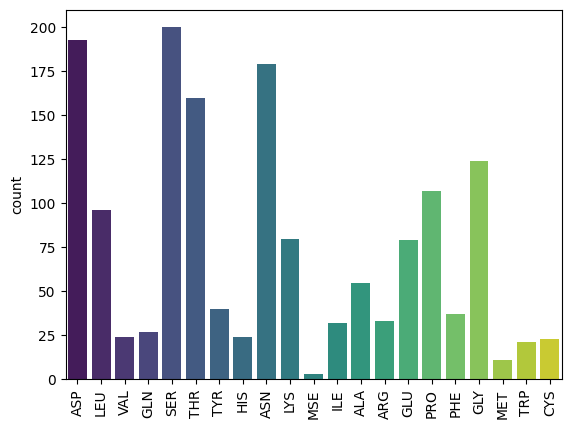

In [ ]:
sns.countplot(x=helix_start, palette='viridis')
plt.xticks(rotation=90)
plt.show()

We can combine the two lists of amino acids and plot them in the same plot to better see how the occurance of the amino acids appear at the start of different secondary structures.

In [ ]:
import pandas as pd

#df_aa = pd.DataFrame([general, len(general) *['general']]).transpose()
df_hel = pd.DataFrame([helix_start, len(helix_start) *['helix_start']]).transpose()
df_beta = pd.DataFrame([sheet_start, len(sheet_start) *['sheet_start']]).transpose()

df = pd.concat((df_hel, df_beta))
df.columns = ['amino_acid', 'location']

df

,amino_acid,location
0,ASP,helix_start
1,LEU,helix_start
2,VAL,helix_start
3,GLN,helix_start
4,SER,helix_start
...,...,...
1726,VAL,sheet_start
1727,LEU,sheet_start
1728,TYR,sheet_start
1729,SER,sheet_start


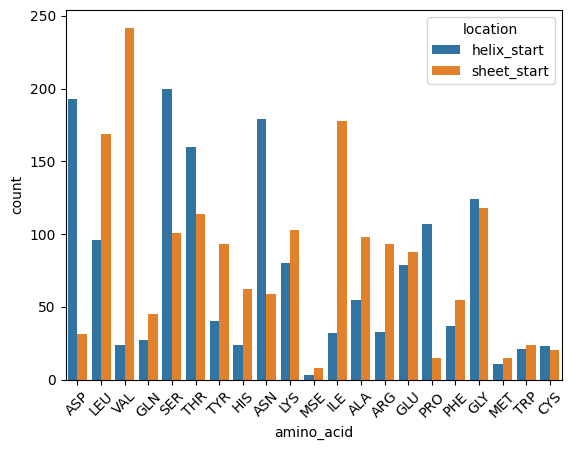

In [ ]:
sns.countplot(x=df['amino_acid'], hue=df['location'])
plt.xticks(rotation=45)
plt.show()